In [1]:
# The purpose of this script is to find a pattern amongst the customers visiting a Mall.
# The dataset used in this script consists of customers data collected by a Mall
# Each row consists of a customer. Each column consists of a customer's variable, including his/her spending score.

In [2]:
# 1. Data pre-processing

In [21]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15,10

# import the dataset
dataset = pd.read_csv('Mall_Customers.csv')

# set the dependent variables
X = dataset.iloc[:,[3,4]].values

In [9]:
# print top 5 dataset values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# 2. select number of clusters

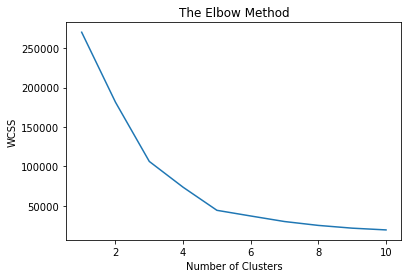

In [11]:
# import kmeans class from the cluster module of the sklearn library
from sklearn.cluster import KMeans

# create an empty list
wcss = []

# for loop to create train the kmeans algorithm on the selected clusters
for i in range(1, 11):
    # create kmeans object
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # train the kmeans algorithm on the dependent variables
    kmeans.fit(X)
    # add the value to the wcss empty list and get the wcss
    wcss.append(kmeans.inertia_)
    
# plot the elbow plot
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# from the elbow plot, I'm selecting 5 clusters for further downstream analysis

In [13]:
# 3. Training K-Means model on the dataset

In [17]:
# create kmeans object with 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# train and predict the k means object on the variables selected
Y_kmeans = kmeans.fit_predict(X)

# visualize the different clusters created
print(Y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [15]:
# 4. Visualize the clusters

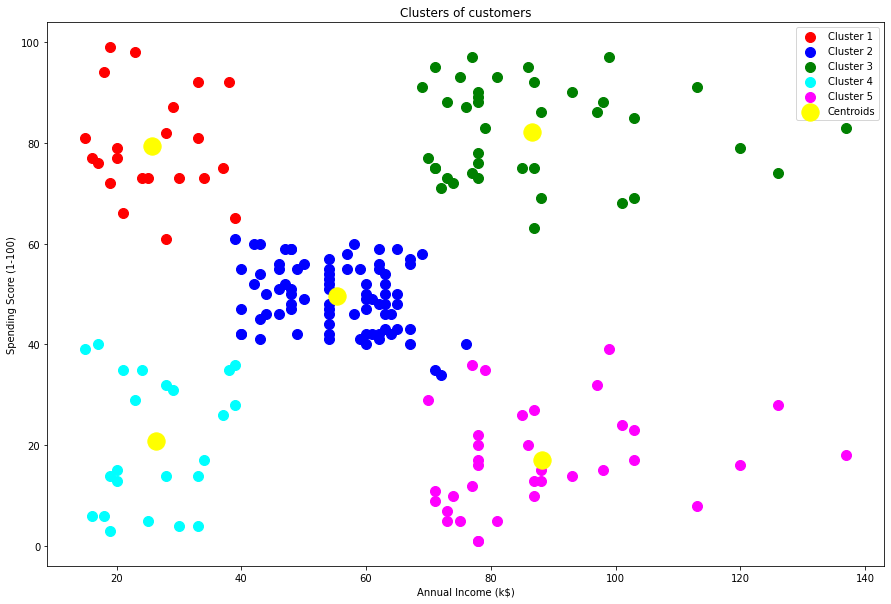

In [23]:
# scatter plot for cluster 1
plt.scatter(X[Y_kmeans == 0,0], X[Y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')

# scatter plot for cluster 2
plt.scatter(X[Y_kmeans == 1,0], X[Y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')

# scatter plot for cluster 3
plt.scatter(X[Y_kmeans == 2,0], X[Y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')

# scatter plot for cluster 4
plt.scatter(X[Y_kmeans == 3,0], X[Y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')

# scatter plot for cluster 5
plt.scatter(X[Y_kmeans == 4,0], X[Y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')

# scatter plot for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

# title for the plot
plt.title('Clusters of customers')

# Axes labels
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')

# show the legend
plt.legend()

# show the plot
plt.show()

In [ ]:
# As you can see, different clusters show the customers who have different annual incomes and their related spending scores.
# This can be used to target certain specific customers based upon these clusters.